In [1]:
import pandas as pd
import numpy as np
import surprise as sp
from surprise.model_selection import train_test_split, cross_validate
from scipy import sparse
import time
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import implicit
%matplotlib inline

In [2]:
df = pd.read_csv("sample.csv",index_col='Unnamed: 0').drop_duplicates(subset = 'uuid')

/home/suils789/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
users = df['uuid'].values
traits = [eval(x) for x in df['encodedTraits.indices'].values]

In [4]:
B = nx.DiGraph()
B.add_nodes_from(users, bipartite=0)
B.add_nodes_from(list(range(1,5198)), bipartite=1)

In [10]:
for i in range(len(users)):
    for j in range(len(traits[i])):
        B.add_edge(users[i], traits[i][j])

In [16]:
B.remove_node(800)

In [20]:
for node in nx.isolates(B):
    B.remove_node(node)

In [25]:
users = [x for x in B.nodes() if type(x) == str]
traits = [x for x in B.nodes() if type(x) == int]

In [26]:
user_traits_matrix = bipartite.matrix.biadjacency_matrix(B, users, traits)

In [27]:
! export MKL_NUM_THREADS=1
# param = best_curves[0]['params']
als = implicit.als.AlternatingLeastSquares(factors=40, regularization=100, calculate_training_loss=True)
als.fit(user_traits_matrix.T.tocsr())

100%|██████████| 15.0/15 [01:37<00:00,  5.67s/it, loss=0.00181]


In [28]:
latent_space = als.user_factors
print(als.item_factors.shape)
print(als.user_factors.shape)

(4802, 40)
(677696, 40)


In [36]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
dbs = KMeans(n_clusters=6, init='k-means++').fit(latent_space)

In [37]:
plt.rcParams['figure.dpi'] = 100

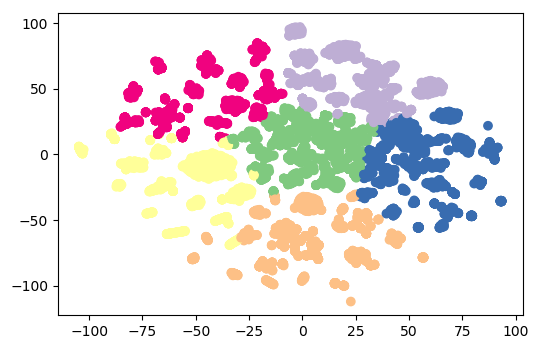

In [38]:
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
latent_space = tsne.fit_transform(als.user_factors[:10000])
plt.scatter(latent_space[:,0], latent_space[:,1], c=plt.cm.Accent(dbs.labels_[:10000]))
# plt.legend(handles=['cluster 0','cluster 1','cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])
plt.show()

In [34]:
kmeans = KMeans(n_clusters=5, init='k-means++').fit(latent_space)

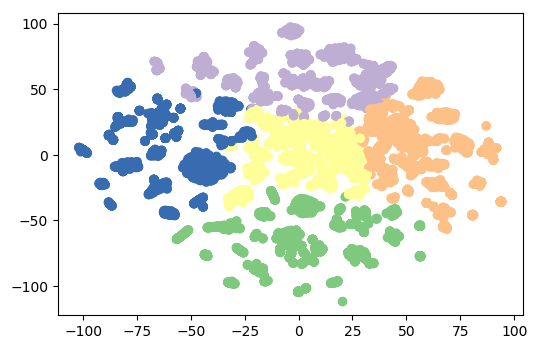

In [35]:
tsne = manifold.TSNE(n_components=2, init='pca')
latent_space = tsne.fit_transform(als.user_factors[:10000])
plt.scatter(latent_space[:,0], latent_space[:,1], c=plt.cm.Accent(kmeans.labels_[:10000]))
# plt.legend(handles=['cluster 0','cluster 1','cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])
plt.show()

In [39]:
kmeans = KMeans(n_clusters=7, init='k-means++').fit(latent_space)

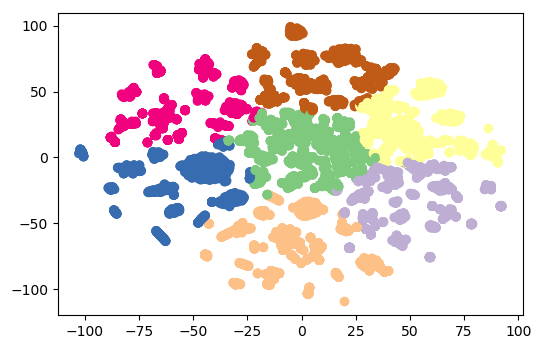

In [40]:
tsne = manifold.TSNE(n_components=2, init='pca')
latent_space = tsne.fit_transform(als.user_factors[:10000])
plt.scatter(latent_space[:,0], latent_space[:,1], c=plt.cm.Accent(kmeans.labels_[:10000]))
# plt.legend(handles=['cluster 0','cluster 1','cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])
plt.show()

In [41]:
kmeans = KMeans(n_clusters=8, init='k-means++').fit(latent_space)

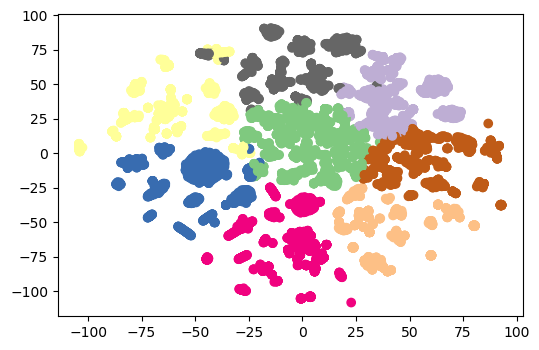

In [42]:
tsne = manifold.TSNE(n_components=2, init='pca')
latent_space = tsne.fit_transform(als.user_factors[:10000])
plt.scatter(latent_space[:,0], latent_space[:,1], c=plt.cm.Accent(kmeans.labels_[:10000]))
# plt.legend(handles=['cluster 0','cluster 1','cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])
plt.show()

In [43]:
#Kmeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline  
import sklearn.metrics as metrics
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='cosine')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

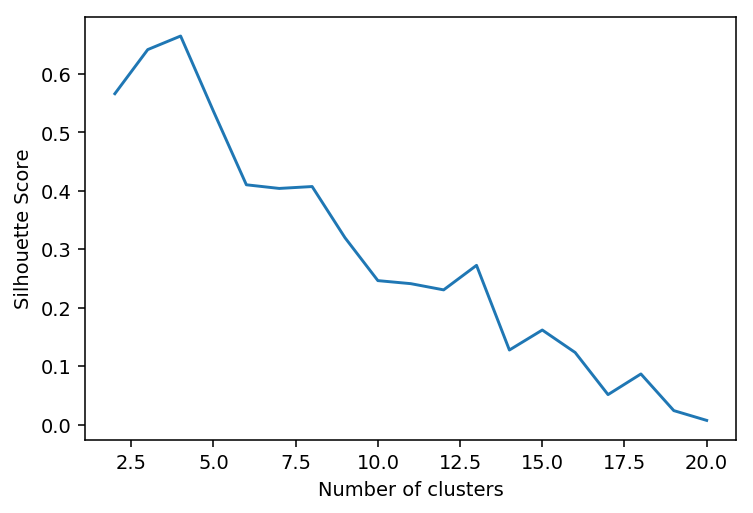

In [45]:
plt.rcParams['figure.dpi'] = 140
sc_evaluate_clusters(latent_space, 20)